In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error,make_scorer,accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [354]:
df= pd.read_csv(os.path.join(os.getcwd(),'data/houseprice/train.csv'))
test = pd.read_csv(os.path.join(os.getcwd(),'data/houseprice/test.csv'))

In [355]:
combine=[df,test]

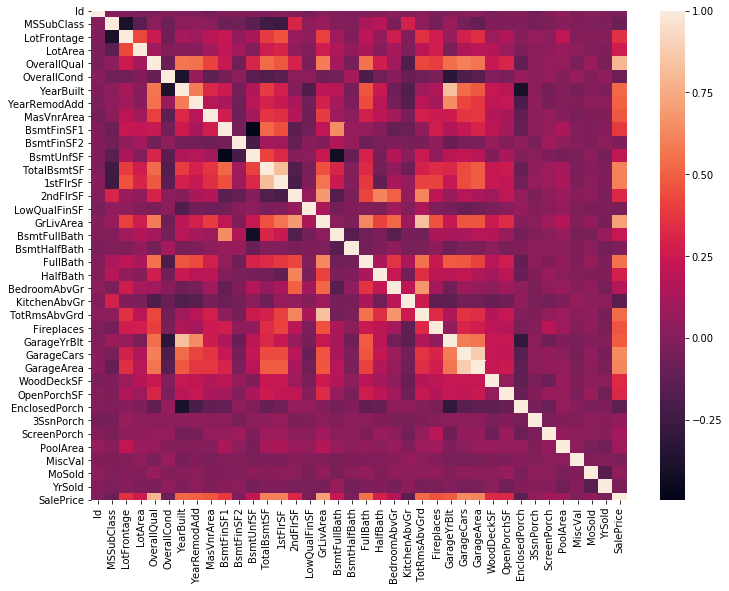

In [356]:
corr = df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr)
## High numeric corr variables: OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)

## Featuring Engineering

In [357]:
df.SalePrice=np.log1p(df.SalePrice)

In [358]:
y = df.SalePrice.values

In [359]:
## Fillna values and encode some categorical features as ordered numbers when there is information in the order
for dataset in combine:
    dataset.loc[:,'Alley'] =dataset.loc[:,'Alley'].fillna(dataset.Alley.mode()[0])
    dataset.loc[:,'MasVnrType']=dataset.loc[:,'MasVnrType'].fillna(dataset.MasVnrType.mode()[0])
    dataset.loc[:,'Electrical']=dataset.loc[:,'Electrical'].fillna(dataset.Electrical.mode()[0])
    dataset.loc[:,'SaleType']=dataset.loc[:,'SaleType'].fillna(dataset.SaleType.mode()[0])
    dataset.loc[:,'Exterior1st']=dataset.loc[:,'Exterior1st'].fillna(dataset.Exterior1st.mode()[0])
    dataset.loc[:,'Exterior2nd']=dataset.loc[:,'Exterior2nd'].fillna(dataset.Exterior2nd.mode()[0])
    dataset.loc[:,'PoolQC']=dataset.loc[:,'PoolQC'].fillna('No')
    dataset.loc[:,'MiscFeature']=dataset.loc[:,'MiscFeature'].fillna('No')
    dataset.loc[:,'Fence']=dataset.loc[:,'Fence'].fillna('No')
    dataset.loc[:,'FireplaceQu']=dataset.loc[:,'FireplaceQu'].fillna('No')
    dataset.loc[:,'LotFrontage']=dataset.loc[:,'LotFrontage'].fillna(0)
    dataset.loc[:,'GarageType']=dataset.loc[:,'GarageType'].fillna('No')
    dataset.loc[:,'GarageFinish']=dataset.loc[:,'GarageFinish'].fillna('No')
    dataset.loc[:,'GarageQual']=dataset.loc[:,'GarageQual'].fillna('No')
    dataset.loc[:,'GarageCond']=dataset.loc[:,'GarageCond'].fillna('No')
    dataset.loc[:,'GarageYrBlt']=dataset.loc[:,'GarageYrBlt'].fillna(0)
    dataset.loc[:, "BsmtQual"] = dataset.loc[:, "BsmtQual"].fillna("No")
    dataset.loc[:, "BsmtCond"] = dataset.loc[:, "BsmtCond"].fillna("No")
    dataset.loc[:, "BsmtExposure"] = dataset.loc[:, "BsmtExposure"].fillna("No")
    dataset.loc[:, "BsmtFinType1"] = dataset.loc[:, "BsmtFinType1"].fillna("No")
    dataset.replace({'MoSold':{1:'Jan',2:'Feb',3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}},inplace=True)
    dataset.loc[:,'MSZoning']=dataset.loc[:,'MSZoning'].fillna(dataset['MSZoning'].mode()[0])
    dataset.MSZoning.replace({'C (all)':'RL'},inplace=True)
    dataset.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},inplace=True)
                

In [360]:
# Create new features
# 1* Simplifications of existing features
for dataset in combine:
    dataset["SimplOverallQual"] = dataset.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
    dataset["SimplOverallCond"] = dataset.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
    dataset["SimplPoolQC"] = dataset.PoolQC.replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                })
    dataset["SimplGarageCond"] = dataset.GarageCond.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    dataset["SimplGarageQual"] = dataset.GarageQual.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplFunctional"] = dataset.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        })
    dataset["SimplKitchenQual"] = dataset.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplHeatingQC"] = dataset.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    dataset["SimplBsmtFinType1"] = dataset.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    dataset["SimplBsmtFinType2"] = dataset.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    dataset["SimplBsmtCond"] = dataset.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    dataset["SimplBsmtQual"] = dataset.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    dataset["SimplExterCond"] = dataset.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    dataset["SimplExterQual"] = dataset.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })


In [361]:
## Combinations of existing features 
for dataset in combine:
    
    dataset['OverallGrade']=dataset.OverallCond * dataset.OverallQual
    dataset['GarageGrade'] = dataset.GarageCond * dataset.GarageQual
    dataset['ExterGrade'] = dataset.ExterCond * dataset.ExterQual
    dataset["KitchenScore"] = dataset["KitchenAbvGr"] * dataset["KitchenQual"]
    dataset["FireplaceScore"] = dataset["Fireplaces"] * dataset["FireplaceQu"]
    dataset["GarageScore"] = dataset["GarageArea"] * dataset["GarageQual"]
    dataset["PoolScore"] = dataset["PoolArea"] * dataset["PoolQC"]
    dataset["SimplOverallGrade"] = dataset["SimplOverallQual"] * dataset["SimplOverallCond"]
    dataset["SimplExterGrade"] = dataset["SimplExterQual"] * dataset["SimplExterCond"]
    dataset["SimplPoolScore"] = dataset["PoolArea"] * dataset["SimplPoolQC"]
    dataset["SimplGarageScore"] = dataset["GarageArea"] * dataset["SimplGarageQual"]
    dataset["SimplFireplaceScore"] = dataset["Fireplaces"] * dataset["SimplFireplaceQu"]
    dataset["SimplKitchenScore"] = dataset["KitchenAbvGr"] * dataset["SimplKitchenQual"]
    dataset['TotalBath']= dataset.BsmtFullBath + 0.5 * dataset.BsmtHalfBath + dataset.FullBath + 0.5*dataset.HalfBath
    dataset['TotalSF']=dataset.GrLivArea + dataset.TotalBsmtSF
    dataset['TotalFlrsSF'] = dataset['1stFlrSF']+dataset['2ndFlrSF']

In [66]:
# 3* Polynomials on the top 10 existing features
# for df in combine:
    
#     df["OverallQual-s2"] = df["OverallQual"] ** 2
#     df["OverallQual-s3"] = df["OverallQual"] ** 3
#     df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
#     df["AllSF-2"] = df["TotalSF"] ** 2
#     df["AllSF-3"] = df["TotalSF"] ** 3
#     df["AllSF-Sq"] = np.sqrt(df["TotalSF"])
#     df["AllFlrsSF-2"] = df["TotalFlrsSF"] ** 2
#     df["AllFlrsSF-3"] = df["TotalFlrsSF"] ** 3
#     df["AllFlrsSF-Sq"] = np.sqrt(df["TotalFlrsSF"])
#     df["GrLivArea-2"] = df["GrLivArea"] ** 2
#     df["GrLivArea-3"] = df["GrLivArea"] ** 3
#     df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
#     df["SimplOverallQual-s2"] = df["SimplOverallQual"] ** 2
#     df["SimplOverallQual-s3"] = df["SimplOverallQual"] ** 3
#     df["SimplOverallQual-Sq"] = np.sqrt(df["SimplOverallQual"])
#     df["ExterQual-2"] = df["ExterQual"] ** 2
#     df["ExterQual-3"] = df["ExterQual"] ** 3
#     df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
#     df["GarageCars-2"] = df["GarageCars"] ** 2
#     df["GarageCars-3"] = df["GarageCars"] ** 3
#     df["GarageCars-Sq"] = np.sqrt(df["GarageCars"])
#     df["TotalBath-2"] = df["TotalBath"] ** 2
#     df["TotalBath-3"] = df["TotalBath"] ** 3
#     df["TotalBath-Sq"] = np.sqrt(df["TotalBath"])
#     df["KitchenQual-2"] = df["KitchenQual"] ** 2
#     df["KitchenQual-3"] = df["KitchenQual"] ** 3
#     df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
#     df["GarageScore-2"] = df["GarageScore"] ** 2
#     df["GarageScore-3"] = df["GarageScore"] ** 3
# #     df["GarageScore-Sq"] = np.sqrt(df["GarageScore"])

#### Assign numerical & categorical features

In [362]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features=numerical_features.drop(['SalePrice','Id'])
train_num = df[numerical_features]
train_cat = df[categorical_features]
train_num = train_num.fillna(train_num.median())
test[numerical_features]=test[numerical_features].fillna(test[numerical_features].median())
test_cat=test[categorical_features]
test_num=test[numerical_features]

In [364]:
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness)>0.5]
skewed_features= skewness.index
train_num[skewed_features] =np.log1p(train_num[skewed_features])
test[skewed_features]=np.log1p(test[skewed_features])

In [365]:
def encode_cat(train,test):
    features=categorical_features
    df_combined=pd.concat([train[features],test[features]])
    for feature in features:
        le= LabelEncoder()
        le=le.fit(df_combined[feature])
        train[feature]=le.transform(train[feature])
        test[feature]=le.transform(test[feature])
    return train,test

train_cat,test_cat=encode_cat(train_cat,test_cat)

In [204]:
# #### One-hot encoding through dummy features
# train_cat = pd.get_dummies(train_cat)
# test_cat=pd.get_dummies(test_cat)

### Create binary categorical feature

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
# scaler = StandardScaler().fit(X_train)
# X_train.loc[:,numerical_features]=scaler.transform(X_train.loc[:,numerical_features])
# X_test.loc[:,numerical_features]=scaler.transform(X_test.loc[:,numerical_features])

In [146]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
    return rmse

## GradientBoostingRegressor and KFold CV

In [90]:
train = pd.concat([train_num,train_cat],axis=1)

In [206]:
test=pd.concat([test_num,test_cat],axis=1)

In [91]:
### Partitioning the data
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

In [133]:
pipeline=make_pipeline(StandardScaler(),GradientBoostingRegressor())

In [134]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingregressor',
   GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='ls', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='auto',
                             random_state=None, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0, warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingregressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_m

In [130]:
# hyperparameters={'randomforestregressor__criterion':['mse','mae'],
# 'randomforestregressor__max_depth':[3,5,8],
# 'randomforestregressor__max_features':['auto','sqrt','log2'],
# 'randomforestregressor__min_samples_leaf':[3,5],
#  'randomforestregressor__min_samples_split':[2,5,8] ,
#   'randomforestregressor__n_estimators':[6,9]                
                
#                 }

In [135]:
hyperparameters= { 'gradientboostingregressor__max_depth': [2,3,4,5],
                'gradientboostingregressor__n_estimators': [3,4,5,6,10],
                 'gradientboostingregressor__learning_rate':[0.5,1] }

In [136]:
clf=GridSearchCV(pipeline,hyperparameters,cv=10)

In [137]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=

In [138]:
clf.best_params_

{'gradientboostingregressor__learning_rate': 0.5,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__n_estimators': 10}

In [139]:
clf.refit

True

In [140]:
y_pred=clf.predict(X_test)

In [141]:
r2_score(y_test,y_pred)

0.8438261466442106

In [144]:
def run_kf(clf):
    kf= KFold(n_splits=10)
    fold=0
    outcome=[]
    for train_index,test_index in kf.split(train):
        fold+=1
        X_train,X_test=train.values[train_index],train.values[test_index]
        y_train,y_test=y[train_index],y[test_index]
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        score=r2_score(y_test,y_pred)
        outcome.append(score)
        print('Fold {} R2 score is:{}'.format(fold,outcome))
    mean_score=np.mean(outcome)
    print('Mean R2 score is:{}'.format(mean_score))

In [145]:
run_kf(clf)

Fold 1 R2 score is:[0.8424805452920742]
Fold 2 R2 score is:[0.8424805452920742, 0.9025559070476372]
Fold 3 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784]
Fold 4 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751]
Fold 5 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751, 0.8685423457310124]
Fold 6 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751, 0.8685423457310124, 0.8725726234581165]
Fold 7 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751, 0.8685423457310124, 0.8725726234581165, 0.868993789452037]
Fold 8 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751, 0.8685423457310124, 0.8725726234581165, 0.868993789452037, 0.8848351070263248]
Fold 9 R2 score is:[0.8424805452920742, 0.9025559070476372, 0.893881229440784, 0.8770505804494751, 0.8685423457310124, 0.8725726

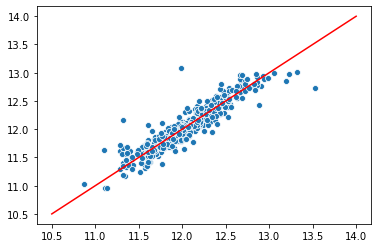

In [150]:
sns.scatterplot(y_test,y_pred)
plt.plot([10.5,14],[10.5,14],color='red')

##### L2 Regularization 

In [23]:
ridge = RidgeCV(alphas=[0.01,0.03,0.06,0.1,0.3,0.6,1,3,6,10,30,60])

In [24]:
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
ridge = RidgeCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv=10)


In [29]:
ridge.fit(X_train,y_train)
ridge.alpha_

10.5

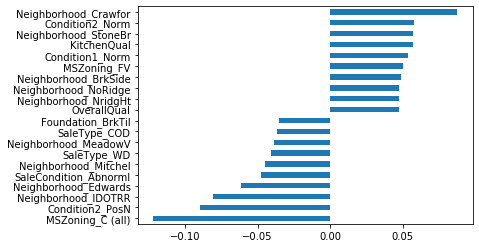

In [30]:
coefs = pd.Series(ridge.coef_,index=X_train.columns)
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])
img.plot(kind='barh')

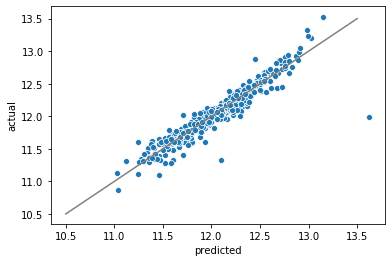

In [31]:
y_pred_rid=ridge.predict(X_test)
sns.scatterplot(y_pred_rid,y_test).set(xlabel='predicted',ylabel='actual')
plt.plot([10.5,13.5],[10.5,13.5],color='gray')

##### Lasso L1 Regularization

In [32]:
lasso = LassoCV(alphas=[0.0001,0.0003,0.0006,0.001,0.003,
                0.006,0.01,0.03,0.06,0.1,0.3,0.6,1],max_iter = 50000,cv=10)

In [33]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06,
                0.1, 0.3, 0.6, 1],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [34]:
alpha = lasso.alpha_

In [35]:
lasso= LassoCV(alphas=[alpha *.6,alpha*.65,alpha*.7,alpha*.75,alpha*.8,alpha*.85,alpha*.9,alpha*.95,
               alpha*1.05,alpha*1.1,alpha*1.15,alpha*1.2,alpha*1.25,alpha*1.3,alpha*1.35,alpha*1.4],
       max_iter = 50000,cv=10)

In [36]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.00035999999999999997, 0.00039, 0.00041999999999999996,
                0.00045, 0.00047999999999999996, 0.0005099999999999999, 0.00054,
                0.00057, 0.0006299999999999999, 0.00066, 0.0006899999999999999,
                0.0007199999999999999, 0.0007499999999999999, 0.00078, 0.00081,
                0.0008399999999999999],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [37]:
lasso.alpha_

0.00054

In [40]:
print('RMSE for lasso is: ', rmse_cv(lasso).mean())
print('RMSE for ridge is:',rmse_cv(ridge).mean())

RMSE for training data is:  0.118724788291836
RMSE for test data is: 0.12234908629211619


In [41]:
y_pred_las= lasso.predict(X_test)

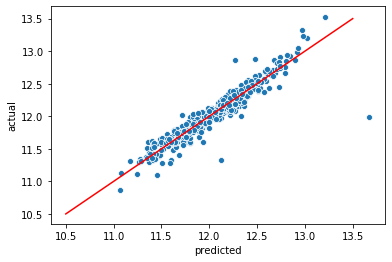

In [42]:
sns.scatterplot(y_pred_las,y_test).set(xlabel='predicted',ylabel='actual')
plt.plot([10.5,13.5],[10.5,13.5],color='red')

In [43]:
coefs = pd.Series(lasso.coef_,index=X_train.columns)

In [44]:
sum(coefs!=0)

119

In [45]:
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])

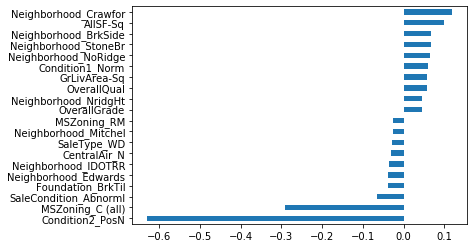

In [46]:
img.plot(kind='barh')

In [47]:
elasticNet=ElasticNetCV(l1_ratio=[0.1,0.3,0.6,0.7,0.8,0.85,0.9,0.95,1],
            alphas=[0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,
                   0.1,0.3,0.6,1,3,6],max_iter=50000,cv=10)

In [48]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.3, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [103]:
alpha = elasticNet.alpha_

In [105]:
ratio= elasticNet.l1_ratio_

In [108]:
elasticNet= ElasticNetCV(l1_ratio=[ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
            alphas=[0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,
                   0.1,0.3,0.6,1,3,6],max_iter=50000,cv=10)

In [109]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69], max_iter=50000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [110]:
## If l1_ratio=1, it means it uses lasso regressor, 0 means ridge
if(elasticNet.l1_ratio_>1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

In [112]:
elasticNet=ElasticNetCV(l1_ratio=ratio, alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4],max_iter=50000,cv=10)

In [113]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0006, 0.0006500000000000001, 0.0007, 0.00075, 0.0008,
                     0.00085, 0.0009000000000000001, 0.00095, 0.001,
                     0.0010500000000000002, 0.0011, 0.00115, 0.00125,
                     0.0013000000000000002, 0.00135, 0.0014],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.51,
             max_iter=50000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [114]:

if (elasticNet.l1_ratio_>1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

In [116]:
coefs = pd.Series(elasticNet.coef_,index=X_train.columns)

In [120]:
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])

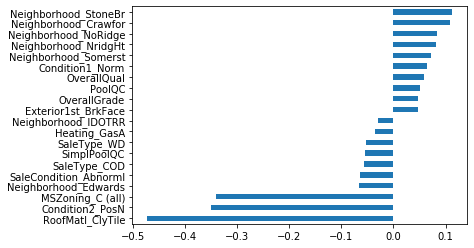

In [121]:
img.plot(kind='barh')

In [125]:
print('RMSE for Ridge is:',rmse_cv(ridge).mean())
print('RMSE for Lasso is:',rmse_cv(lasso).mean())
print('RMSE for ElasticNet is:',rmse_cv(elasticNet).mean())

RMSE for Ridge is: 0.11726319621410952
RMSE for Lasso is: 0.11987155899776
RMSE for ElasticNet is: 0.12031450425905603
